## Load Data


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('online_shoppers_intention.csv')
df.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [44]:
# Working copy for processing
df_clean = df.copy()


## Overview


In [45]:
df_clean.shape
df_clean.columns


Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [46]:
df_clean.dtypes


Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [47]:
df_clean.isna().sum().sort_values(ascending=False)


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [48]:
# Check duplicate rows (exact matches)
dup_mask = df_clean.duplicated(keep=False)
dup_count = dup_mask.sum()
dup_pct = (dup_count / len(df_clean)).round(4)
dup_groups = df_clean[dup_mask].groupby(list(df_clean.columns)).size().sort_values(ascending=False)
dup_groups.head(10)

dup_count, dup_pct


(np.int64(201), np.float64(0.0163))

In [49]:
# Remove exact duplicate rows (only once)
before = len(df_clean)
df_clean = df_clean.drop_duplicates().reset_index(drop=True)
after = len(df_clean)
removed = before - after
before, after, removed


(12330, 12205, 125)

In [50]:
df_clean.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Administrative,12205.0,NaN,NaN,NaN,2.338878,3.330436,0.0,0.0,1.0,4.0,27.0
Administrative_Duration,12205.0,NaN,NaN,NaN,81.646331,177.491845,0.0,0.0,9.0,94.7,3398.75
Informational,12205.0,NaN,NaN,NaN,0.508726,1.275617,0.0,0.0,0.0,0.0,24.0
Informational_Duration,12205.0,NaN,NaN,NaN,34.825454,141.424807,0.0,0.0,0.0,0.0,2549.375
ProductRelated,12205.0,NaN,NaN,NaN,32.045637,44.593649,0.0,8.0,18.0,38.0,705.0
ProductRelated_Duration,12205.0,NaN,NaN,NaN,1206.982457,1919.6014,0.0,193.0,608.942857,1477.154762,63973.52223
BounceRates,12205.0,NaN,NaN,NaN,0.02037,0.045255,0.0,0.0,0.002899,0.016667,0.2
ExitRates,12205.0,NaN,NaN,NaN,0.041466,0.046163,0.0,0.014231,0.025,0.048529,0.2
PageValues,12205.0,NaN,NaN,NaN,5.949574,18.653671,0.0,0.0,0.0,0.0,361.763742
SpecialDay,12205.0,NaN,NaN,NaN,0.061942,0.199666,0.0,0.0,0.0,0.0,1.0


## Distributions


In [51]:
# Categorical distributions
cat_cols = df_clean.select_dtypes(include=['object', 'category', 'bool']).columns
{col: df_clean[col].value_counts(dropna=False) for col in cat_cols}


{'Month': Month
 May     3329
 Nov     2982
 Mar     1860
 Dec     1706
 Oct      549
 Sep      448
 Aug      433
 Jul      432
 June     285
 Feb      181
 Name: count, dtype: int64,
 'VisitorType': VisitorType
 Returning_Visitor    10431
 New_Visitor           1693
 Other                   81
 Name: count, dtype: int64,
 'Weekend': Weekend
 False    9346
 True     2859
 Name: count, dtype: int64,
 'Revenue': Revenue
 False    10297
 True      1908
 Name: count, dtype: int64}

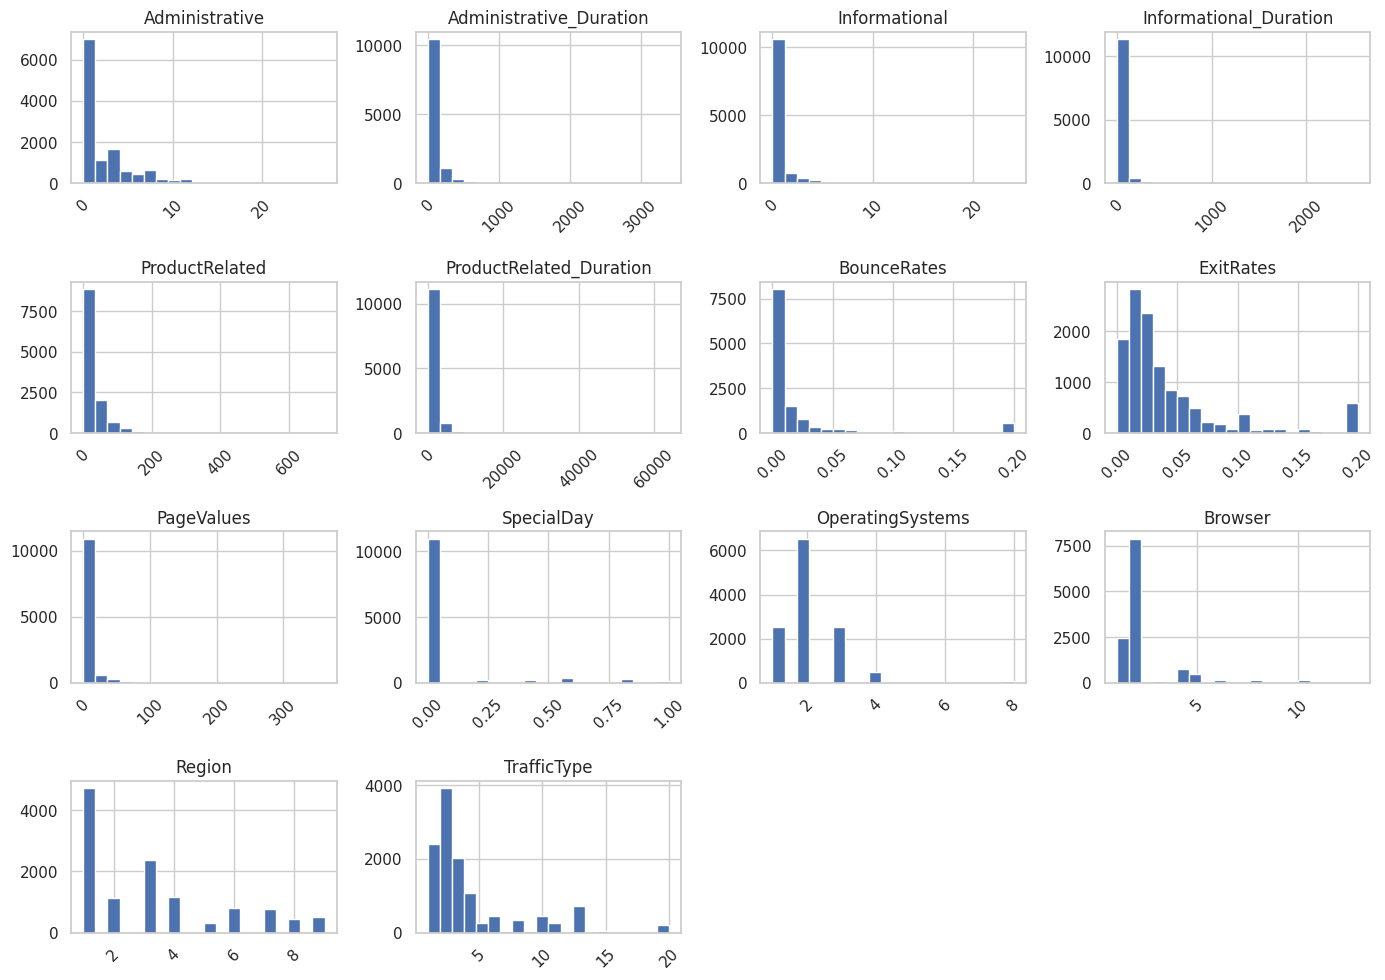

In [52]:
# Numeric distributions
num_cols = df_clean.select_dtypes(include='number').columns
axes = df_clean[num_cols].hist(figsize=(14, 10), bins=20, layout=(4, 4))
for ax in axes.flatten():
    if ax is not None:
        ax.tick_params(axis='x', labelrotation=45)
plt.tight_layout()


## Outliers


In [53]:
# IQR outlier summary (numeric meaningful columns only)
outlier_cols = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'
]
q1 = df_clean[outlier_cols].quantile(0.25)
q3 = df_clean[outlier_cols].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outlier_mask = (df_clean[outlier_cols] < lower) | (df_clean[outlier_cols] > upper)
outlier_summary = outlier_mask.sum().sort_values(ascending=False)
outlier_pct = (outlier_summary / len(df_clean)).round(4)
outlier_table = pd.DataFrame({'outlier_count': outlier_summary, 'outlier_pct': outlier_pct})
outlier_table


,outlier_count,outlier_pct
PageValues,2730,0.2237
Informational,2631,0.2156
Informational_Duration,2405,0.1971
BounceRates,1428,0.1170
ExitRates,1325,0.1086
SpecialDay,1249,0.1023
Administrative_Duration,1149,0.0941
ProductRelated,1007,0.0825
ProductRelated_Duration,951,0.0779
Administrative,404,0.0331


In [54]:
# Outlier handling
clip_01_cols = ['BounceRates', 'ExitRates', 'SpecialDay']
for col in clip_01_cols:
    df_clean[col] = df_clean[col].clip(0, 1)

clip_p99_cols = [
    'Administrative', 'Informational', 'ProductRelated',
    'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration',
    'PageValues'
]
for col in clip_p99_cols:
    p99 = df_clean[col].quantile(0.99)
    df_clean[col] = df_clean[col].clip(upper=p99)

df_clean[clip_01_cols + clip_p99_cols].describe().T[['min', 'max', 'mean', 'std']]


,min,max,mean,std
BounceRates,0.0,0.200000,0.020370,0.045255
ExitRates,0.0,0.200000,0.041466,0.046163
SpecialDay,0.0,1.000000,0.061942,0.199666
Administrative,0.0,14.000000,2.309218,3.199232
Informational,0.0,6.000000,0.490455,1.154280
ProductRelated,0.0,221.000000,31.127735,38.331027
Administrative_Duration,0.0,838.704889,77.021957,142.728817
Informational_Duration,0.0,722.379200,30.696256,105.268590
ProductRelated_Duration,0.0,8704.271573,1164.588940,1555.729802
PageValues,0.0,86.108689,5.496011,14.942396


## EDA


In [55]:
# Clean visual style
sns.set_theme(style='whitegrid', context='notebook')


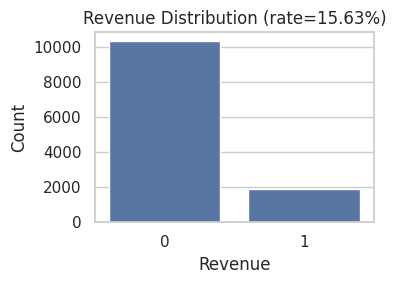

In [56]:
# Revenue distribution and rate
rev_counts = df_clean['Revenue'].value_counts().sort_index()
rev_rate = df_clean['Revenue'].mean()

fig, ax = plt.subplots(figsize=(4, 3))
sns.barplot(x=rev_counts.index.astype(int), y=rev_counts.values, ax=ax, color='#4C72B0')
ax.set_title(f'Revenue Distribution (rate={rev_rate:.2%})')
ax.set_xlabel('Revenue')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()


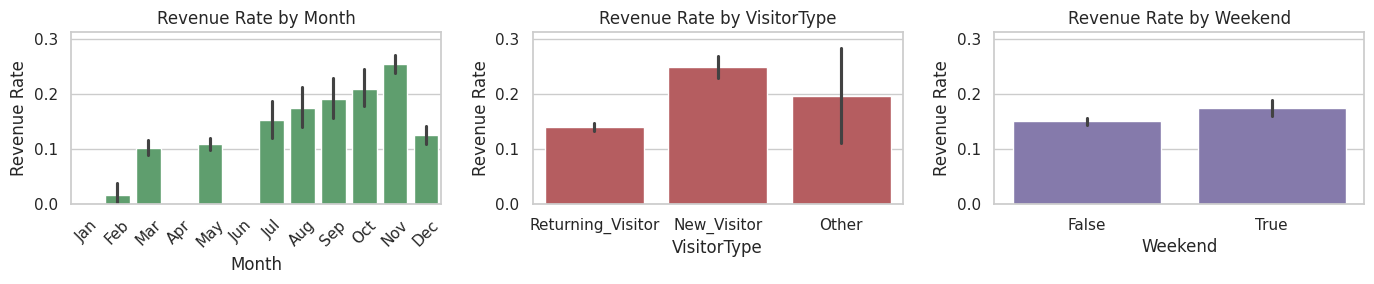

In [57]:
# Revenue rate by categorical segments
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
fig, axes = plt.subplots(1, 3, figsize=(14, 3))
sns.barplot(x='Month', y='Revenue', data=df_clean, order=month_order, ax=axes[0], color='#55A868')
axes[0].set_title('Revenue Rate by Month')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x='VisitorType', y='Revenue', data=df_clean, ax=axes[1], color='#C44E52')
axes[1].set_title('Revenue Rate by VisitorType')

sns.barplot(x='Weekend', y='Revenue', data=df_clean, ax=axes[2], color='#8172B3')
axes[2].set_title('Revenue Rate by Weekend')

for ax in axes:
    ax.set_ylabel('Revenue Rate')
    ax.set_ylim(0, df_clean['Revenue'].mean() * 2 if df_clean['Revenue'].mean() > 0 else 1)

plt.tight_layout()
plt.show()


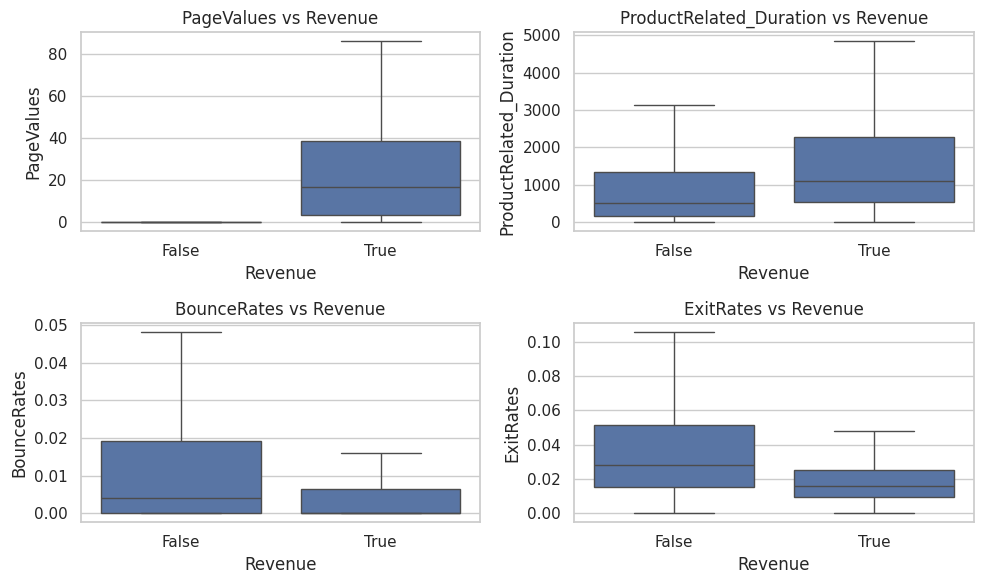

In [58]:
# Key numeric features vs Revenue (clean boxplots)
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
sns.boxplot(x='Revenue', y='PageValues', data=df_clean, ax=axes[0, 0], showfliers=False)
axes[0, 0].set_title('PageValues vs Revenue')
sns.boxplot(x='Revenue', y='ProductRelated_Duration', data=df_clean, ax=axes[0, 1], showfliers=False)
axes[0, 1].set_title('ProductRelated_Duration vs Revenue')
sns.boxplot(x='Revenue', y='BounceRates', data=df_clean, ax=axes[1, 0], showfliers=False)
axes[1, 0].set_title('BounceRates vs Revenue')
sns.boxplot(x='Revenue', y='ExitRates', data=df_clean, ax=axes[1, 1], showfliers=False)
axes[1, 1].set_title('ExitRates vs Revenue')
plt.tight_layout()
plt.show()


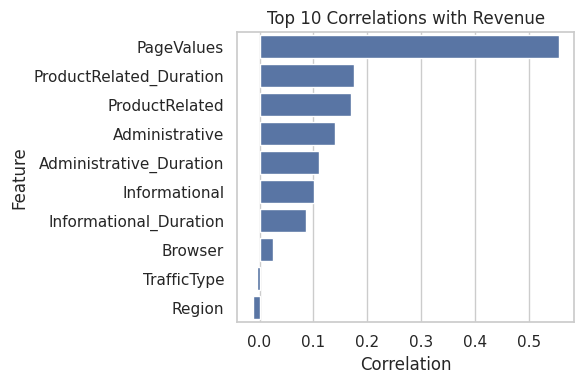

In [59]:
# Top correlations with Revenue
num_df = df_clean.select_dtypes(include='number').copy()
if 'Revenue' not in num_df.columns:
    num_df['Revenue'] = df_clean['Revenue'].astype(int)
corr_rev = num_df.corr(numeric_only=True)['Revenue'].sort_values(ascending=False)
top_corr = corr_rev.drop('Revenue').head(10)

plt.figure(figsize=(6, 4))
sns.barplot(x=top_corr.values, y=top_corr.index, color='#4C72B0')
plt.title('Top 10 Correlations with Revenue')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


## Correlation


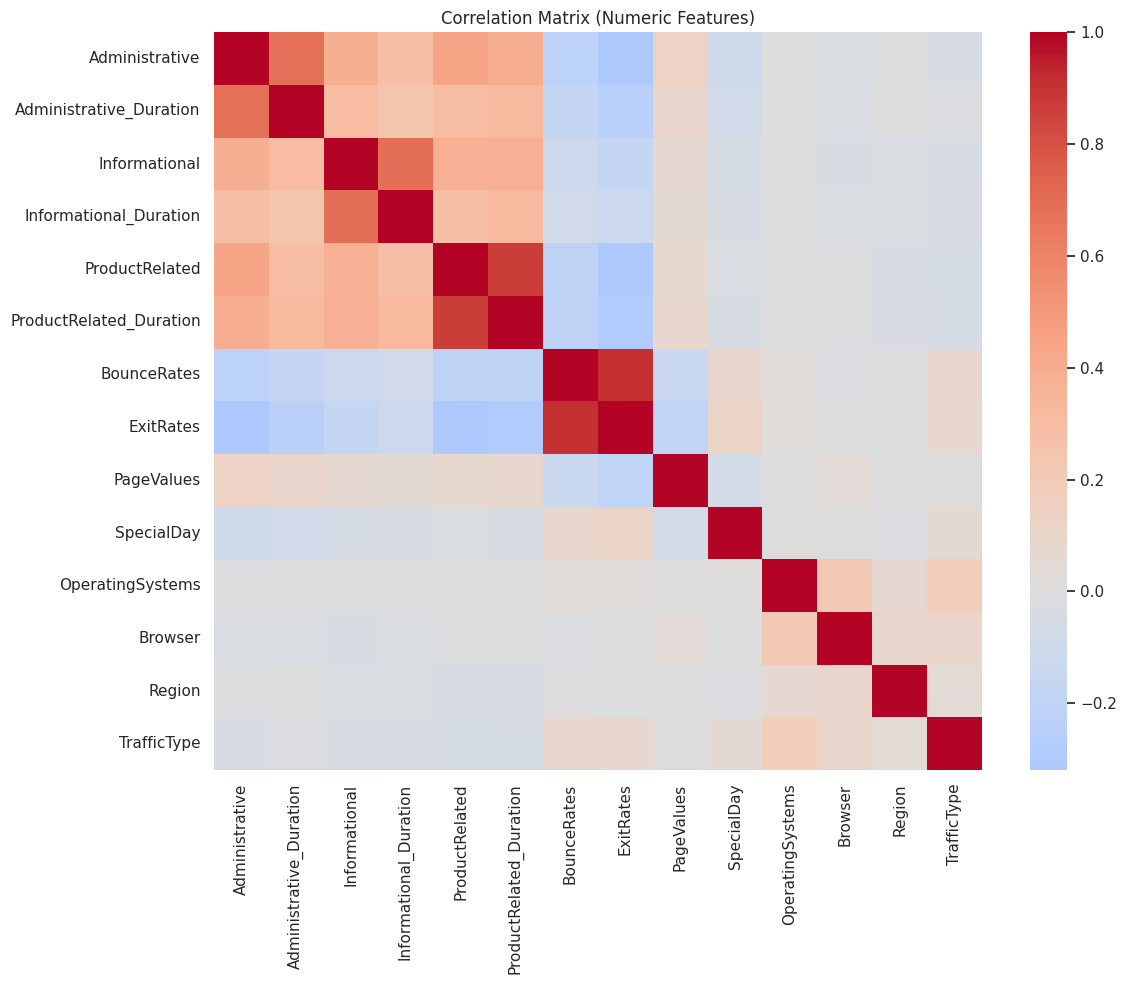

BounceRates     ExitRates                  0.902144
ProductRelated  ProductRelated_Duration    0.870249
Informational   Informational_Duration     0.686949
Administrative  Administrative_Duration    0.684665
                ProductRelated             0.440552
                ProductRelated_Duration    0.394693
                Informational              0.381454
Informational   ProductRelated_Duration    0.379471
                ProductRelated             0.378314
Administrative  ExitRates                  0.319570
dtype: float64

In [60]:
# Correlation matrix and top 10 absolute correlations
num_df = df_clean.select_dtypes(include='number')
corr = num_df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Matrix (Numeric Features)')
plt.tight_layout()
plt.show()

corr_abs = corr.abs()
mask = np.triu(np.ones_like(corr_abs, dtype=bool), k=1)
top10 = corr_abs.where(mask).stack().sort_values(ascending=False).head(10)
top10


## Encoding


In [61]:
# Label encoding according to agreed mapping
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
visit_map = {'Other': 0, 'New Visitor': 1, 'Returning Visitor': 2}
bool_map = {False: 0, True: 1}

df_clean['Month'] = df_clean['Month'].map(month_map)
df_clean['VisitorType'] = df_clean['VisitorType'].map(visit_map)
df_clean['Weekend'] = df_clean['Weekend'].map(bool_map)
df_clean['Revenue'] = df_clean['Revenue'].map(bool_map)

df_clean[['Month', 'VisitorType', 'Weekend', 'Revenue']].head()


,Month,VisitorType,Weekend,Revenue
0,2.0,NaN,0,0
1,2.0,NaN,0,0
2,2.0,NaN,0,0
3,2.0,NaN,0,0
4,2.0,NaN,1,0


## Classification

### Logistic Regression

## Modeling: Logistic Regression and Decision Tree

This section implements two classifiers (Logistic Regression and Decision Tree) to predict `Revenue` using scikit-learn. It includes hyperparameter search with GridSearchCV and evaluation metrics.

In [62]:
# Imports and preprocessing (safe: uses existing df_clean if available)
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

# load/prepare dataframe (use df_clean if present in notebook; else read csv)
try:
    df_model = df_clean.copy()
    print('Using existing df_clean from notebook')
except Exception:
    df_model = pd.read_csv('online_shoppers_intention.csv')
    print('Loaded online_shoppers_intention.csv')

# target and features
if 'Revenue' not in df_model.columns:
    raise ValueError("Target column 'Revenue' not found in dataframe")

# Ensure target is binary integer 0/1
if df_model['Revenue'].dtype == 'bool':
    y = df_model['Revenue'].astype(int)
else:
    # some datasets have 'TRUE'/'FALSE' strings
    if df_model['Revenue'].dtype == object:
        y = df_model['Revenue'].map({True:1, False:0, 'TRUE':1, 'True':1, 'true':1, 'FALSE':0, 'False':0, 'false':0}).fillna(0).astype(int)
    else:
        y = df_model['Revenue'].astype(int)

X = df_model.drop(columns=['Revenue'])

# identify column types
cat_cols = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

print(f"Numeric cols: {len(num_cols)}, Categorical cols: {len(cat_cols)}")

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

# train/test split (stratify to keep class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

print('Split complete:', X_train.shape, X_test.shape)

Using existing df_clean from notebook
Numeric cols: 17, Categorical cols: 0
Split complete: (9764, 17) (2441, 17)


Fitting 5 folds for each of 56 candidates, totalling 280 fits


/home/datqu6c/Documents/rmit/datasci-asm3/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/home/datqu6c/Documents/rmit/datasci-asm3/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(
/home/datqu6c/Documents/rmit/datasci-asm3/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead

Best LogisticRegression params:
{'classifier__C': 0.01, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}

Classification report (Logistic Regression):
              precision    recall  f1-score   support

           0     0.8925    0.9801    0.9343      2059
           1     0.7722    0.3639    0.4947       382

    accuracy                         0.8837      2441
   macro avg     0.8324    0.6720    0.7145      2441
weighted avg     0.8737    0.8837    0.8655      2441

ROC AUC: 0.9024192092435458


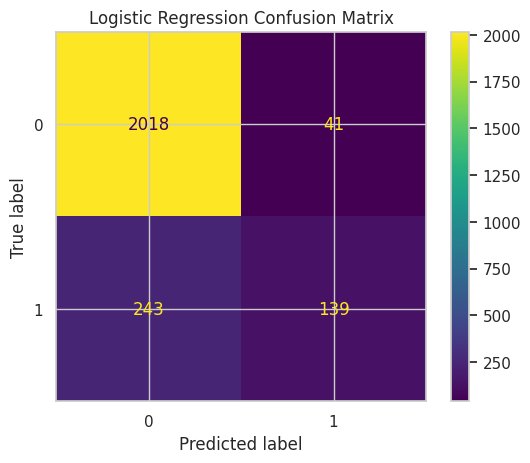

In [63]:
# Logistic Regression with GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

# Build pipeline
logreg_pipeline = Pipeline(steps=[('preproc', preprocessor), ('classifier', LogisticRegression(max_iter=5000, random_state=42))])

# Parameter grid with valid solver/penalty combinations as separate dicts
param_grid_logreg = [
    # liblinear supports l1 and l2
    {'classifier__solver': ['liblinear'], 'classifier__penalty': ['l1', 'l2'], 'classifier__C': [0.01, 0.1, 1, 10]},
    # saga supports l1, l2, elasticnet, none (elasticnet uses l1_ratio)
    {'classifier__solver': ['saga'], 'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'], 'classifier__C': [0.01, 0.1, 1, 10], 'classifier__l1_ratio': [0.0, 0.5, 1.0]}
]

gs_logreg = GridSearchCV(logreg_pipeline, param_grid_logreg, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
gs_logreg.fit(X_train, y_train)

print('Best LogisticRegression params:')
print(gs_logreg.best_params_)

# Evaluate on test set
y_pred = gs_logreg.predict(X_test)
probs = gs_logreg.predict_proba(X_test)[:,1]
print('\nClassification report (Logistic Regression):')
print(classification_report(y_test, y_pred, digits=4))
print('ROC AUC:', roc_auc_score(y_test, probs))

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(gs_logreg, X_test, y_test)
plt.title('Logistic Regression Confusion Matrix')
plt.show()

### Logistic Regression hyperparameters — explanation and tuning options

Below are common Logistic Regression hyperparameters, reasonable ranges to try, and notes on tuning decisions.

- solver
  - Purpose: optimization algorithm used to fit the model.
  - Common values: 'liblinear', 'lbfgs', 'sag', 'saga', 'newton-cg'.
  - Notes: 'liblinear' is good for small datasets and supports 'l1'/'l2'; 'saga' supports 'l1' and 'elasticnet' and scales to larger datasets; 'lbfgs' is robust but doesn't support 'l1' or 'elasticnet'.
  - Tuning: pick a solver that supports the penalties you want to explore; include solver in grid search only as valid combinations.

- penalty
  - Purpose: regularization type to avoid overfitting.
  - Common values: 'l2' (ridge), 'l1' (lasso), 'elasticnet' (mix), 'none'.
  - Ranges to try: ['l1','l2'] for quick search; add 'elasticnet' if you want to tune l1_ratio.
  - Tuning: if you expect sparse coefficients, try 'l1' or 'elasticnet' with small l1_ratio.

- C
  - Purpose: inverse regularization strength (smaller -> stronger regularization).
  - Typical grid: [1e-4, 1e-2, 0.1, 1, 10, 100]
  - Tuning: search on a log scale; strong regularization (small C) reduces variance but increases bias.

- l1_ratio
  - Purpose: proportion of L1 penalty in 'elasticnet' penalty.
  - Typical grid: [0.0, 0.25, 0.5, 0.75, 1.0]
  - Notes: only used when penalty='elasticnet' and with solvers that support it (e.g., 'saga').

- max_iter
  - Purpose: max optimization iterations.
  - Default: usually 100; increase (e.g., 1000 or 5000) if convergence warnings occur.

- class_weight
  - Purpose: handle class imbalance (e.g., Revenue is often imbalanced).
  - Typical options: None, 'balanced', or a dict {0: w0, 1: w1}.
  - Tuning: try 'balanced' or explicitly tune weights to improve recall for the minority class.

Tuning strategy:
- Start with a small grid focusing on 'C' and 'penalty' with a solver that supports those penalties.
- Use scoring that reflects your business goal (ROC-AUC for ranking, F1/recall if positive class detection is critical).
- If using elasticnet, add l1_ratio to the grid.
- Use cross-validation (stratified) and examine validation curves for C to understand sensitivity.

Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Best DecisionTree params:
{'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__max_features': None, 'classifier__min_samples_leaf': 8, 'classifier__min_samples_split': 2}

Classification report (Decision Tree):
              precision    recall  f1-score   support

           0     0.9295    0.9475    0.9384      2059
           1     0.6842    0.6126    0.6464       382

    accuracy                         0.8951      2441
   macro avg     0.8069    0.7801    0.7924      2441
weighted avg     0.8911    0.8951    0.8927      2441

ROC AUC: 0.9237430359372338
Best DecisionTree params:
{'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__max_features': None, 'classifier__min_samples_leaf': 8, 'classifier__min_samples_split': 2}

Classification report (Decision Tree):
              precision    recall  f1-score   support

           0     0.9295    0.9475    0.9384      2059


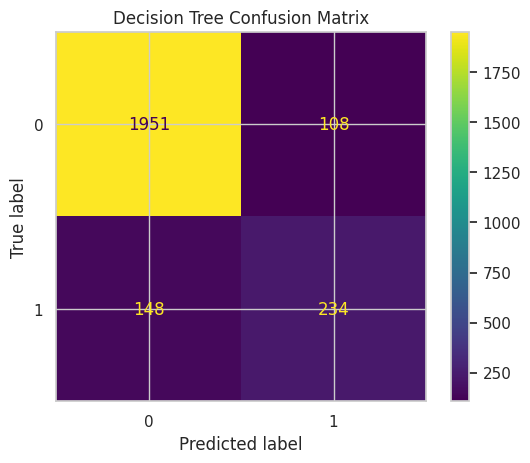

In [64]:
# Decision Tree with GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

dt_pipeline = Pipeline(steps=[('preproc', preprocessor), ('classifier', DecisionTreeClassifier(random_state=42))])

param_grid_dt = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 3, 5, 7, 10, 20],
    'classifier__min_samples_split': [2, 5, 10, 20],
    'classifier__min_samples_leaf': [1, 2, 4, 8],
    'classifier__max_features': [None, 'sqrt', 'log2', 0.5]
}

gs_dt = GridSearchCV(dt_pipeline, param_grid_dt, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
gs_dt.fit(X_train, y_train)

print('Best DecisionTree params:')
print(gs_dt.best_params_)

# Evaluate on test set
y_pred_dt = gs_dt.predict(X_test)
probs_dt = gs_dt.predict_proba(X_test)[:,1]
print('\nClassification report (Decision Tree):')
print(classification_report(y_test, y_pred_dt, digits=4))
print('ROC AUC:', roc_auc_score(y_test, probs_dt))

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(gs_dt, X_test, y_test)
plt.title('Decision Tree Confusion Matrix')
plt.show()

### Decision Tree hyperparameters — explanation and tuning options

- criterion
  - Purpose: function to measure the quality of a split.
  - Options: 'gini' (Gini impurity), 'entropy' (information gain).
  - Tuning: try both; differences are usually small but "entropy" can be marginally slower.

- max_depth
  - Purpose: maximum depth of the tree; controls complexity.
  - Typical grid: [None, 3, 5, 7, 10, 20].
  - Tuning: smaller values reduce variance (less overfitting). If your tree overfits, reduce max_depth.

- min_samples_split
  - Purpose: minimum number of samples required to split an internal node.
  - Typical grid: [2, 5, 10, 20].
  - Tuning: increase to prevent small splits that overfit.

- min_samples_leaf
  - Purpose: minimum number of samples required to be at a leaf node.
  - Typical grid: [1,2,4,8].
  - Tuning: larger values smooth the model and reduce overfitting.

- max_features
  - Purpose: number of features considered when looking for the best split.
  - Options: None (all), 'sqrt', 'log2', or a float fraction like 0.5.
  - Tuning: smaller values add randomness and reduce variance; useful in ensembles.

Tuning strategy:
- Trees can overfit easily; put emphasis on max_depth, min_samples_leaf and min_samples_split in the search.
- For interpretability you might prefer shallow trees (max_depth <= 7).
- Use ROC-AUC or your business metric for scoring. If the dataset is imbalanced, consider class_weight or resampling.

In [65]:
# Compare models and report

def summarize_model_results(name, gs, X_test, y_test):
    y_pred = gs.predict(X_test)
    probs = gs.predict_proba(X_test)[:,1]
    print(f"--- {name} ---")
    print('Best params:', gs.best_params_)
    print(classification_report(y_test, y_pred, digits=4))
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('ROC AUC:', roc_auc_score(y_test, probs))
    print('\n')

# Summaries (only if the searches ran)
try:
    summarize_model_results('Logistic Regression', gs_logreg, X_test, y_test)
except NameError:
    print('Logistic Regression model not found (run previous cell).')

try:
    summarize_model_results('Decision Tree', gs_dt, X_test, y_test)
except NameError:
    print('Decision Tree model not found (run previous cell).')


# Next steps / notes
print('Notes:')
print('- Use class_weight or resample if the positive class is rare to improve recall.')
print("- Consider using RandomizedSearchCV for larger hyperparameter spaces to save compute.")
print("- Try feature engineering (interaction terms, target encoding for high-cardinality categorical cols) and calibration for probability estimates.")

--- Logistic Regression ---
Best params: {'classifier__C': 0.01, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
              precision    recall  f1-score   support

           0     0.8925    0.9801    0.9343      2059
           1     0.7722    0.3639    0.4947       382

    accuracy                         0.8837      2441
   macro avg     0.8324    0.6720    0.7145      2441
weighted avg     0.8737    0.8837    0.8655      2441

Accuracy: 0.8836542400655469
ROC AUC: 0.9024192092435458


--- Decision Tree ---
Best params: {'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__max_features': None, 'classifier__min_samples_leaf': 8, 'classifier__min_samples_split': 2}
              precision    recall  f1-score   support

           0     0.9295    0.9475    0.9384      2059
           1     0.6842    0.6126    0.6464       382

    accuracy                         0.8951      2441
   macro avg     0.8069    0.7801    0.7924      2441
weighted